 # Task  
    Kindly download the dataset of Fruits 360 from Kaggle
    https://www.kaggle.com/datasets/moltean/fruits
    a.Convert all the images which are in the training folder into 1D with labels.
    b. Apply Classification models on that dataset and show which one performs best on their best parameters.
    Then write the deployment code of that model.

In [20]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report ,accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
print(os.listdir("../OpenCvDataSet/fruits-360-original-size/fruits-360-original-size/Training"))

['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


In [3]:
folder_paths = [
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_6",
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_braeburn_1",
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_crimson_snow_1",
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_golden_1",

    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_pink_lady_1",
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_red_1",

    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_red_delicios_1",
  
    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\apple_rotten_1",

    
  

    r"D:\Python Languages\Navttac AI course\OpenCvDataSet\fruits-360-original-size\fruits-360-original-size\Training\pear_1",

   
]

In [4]:
### This file will 
dataset =[]

for i in folder_paths:
    folder_name = os.path.basename(i)
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        
        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # If the image was successfully loaded
            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (250, 250))
                
                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

In [5]:
## convert the matrix into dataFrame and change last column name into Label 

img_df = pd.DataFrame(data =dataset)
img_df.rename(columns={img_df.iloc[:, -1].name : "label"},inplace=True)
img_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,apple_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2823,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,pear_1
2824,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,pear_1
2825,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,pear_1
2826,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,pear_1


In [6]:
## Count the label value in row
y = img_df.iloc[: , -1]
y.value_counts()

pear_1                  326
apple_braeburn_1        320
apple_rotten_1          319
apple_crimson_snow_1    318
apple_6                 315
apple_pink_lady_1       313
apple_red_1             309
apple_golden_1          308
apple_red_delicios_1    300
Name: label, dtype: int64

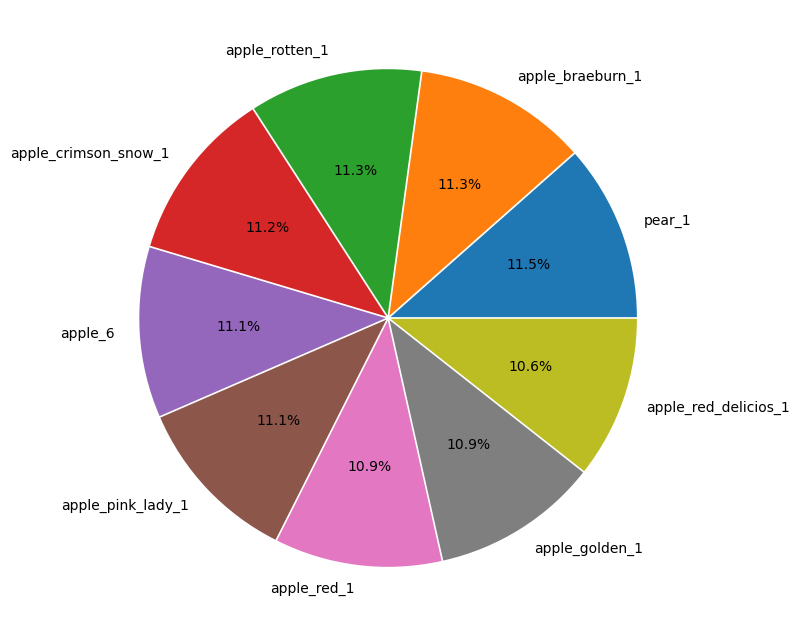

In [8]:
## 
plt.figure(figsize=(8,8))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.1f%%',explode = [0.01 for i in range(9)]);


Text(0, 0.5, 'Images')

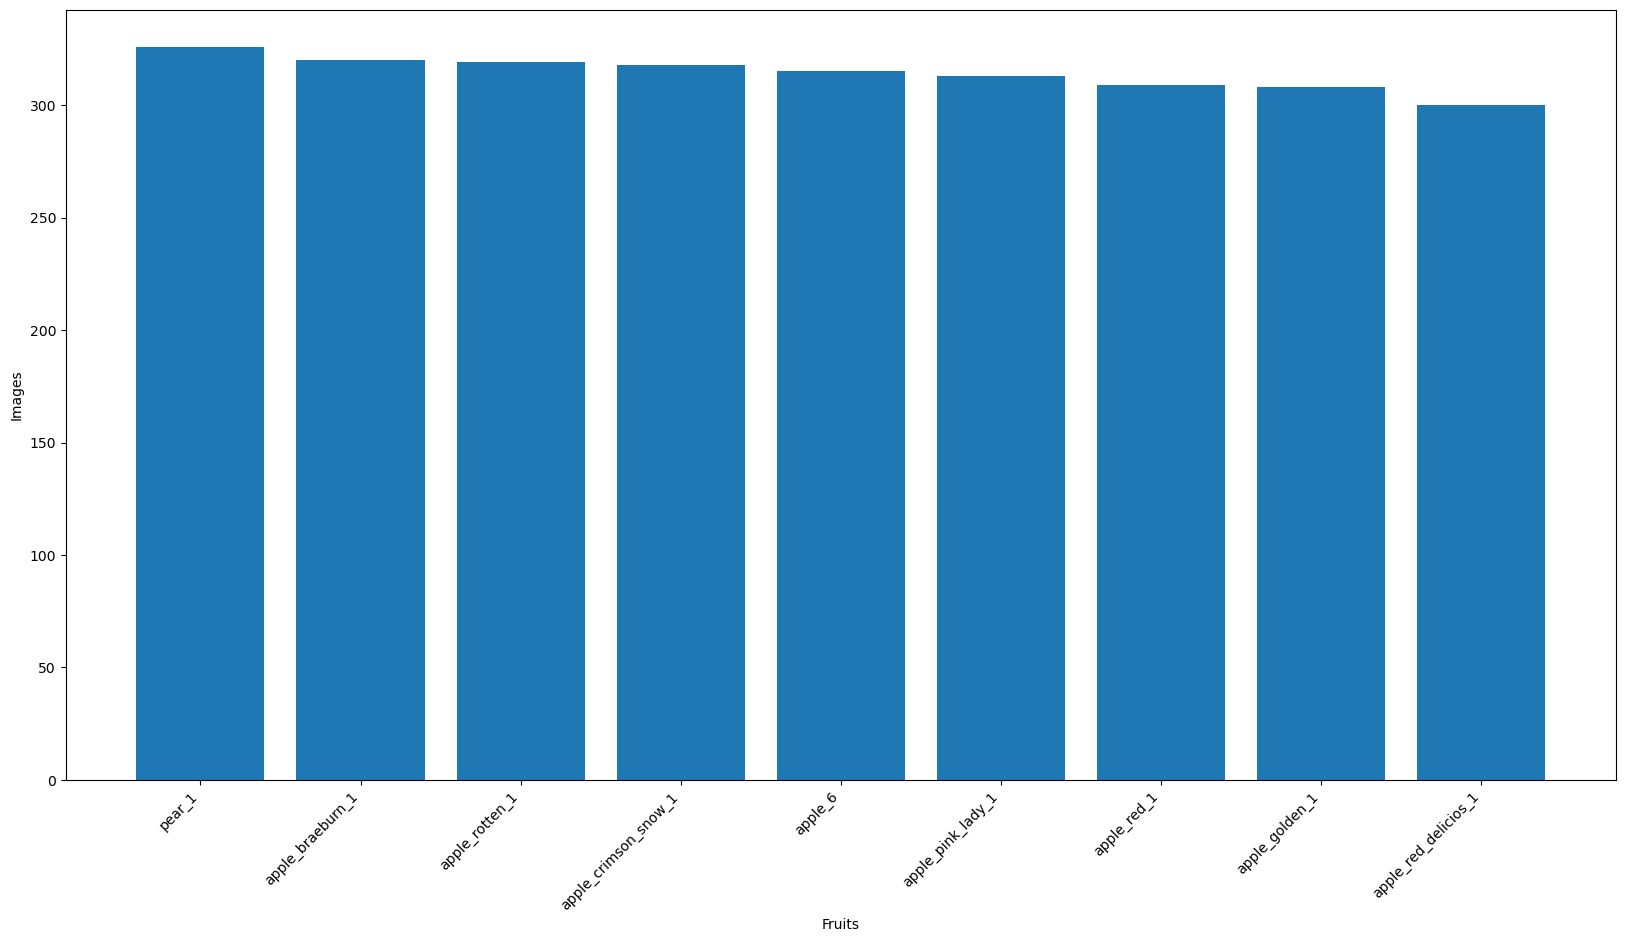

In [9]:

plt.figure(figsize=(20,10))
plt.bar(y.value_counts().index, y.value_counts().values ,)
plt.xticks(rotation=45, ha='right');
plt.xlabel("Fruits")
plt.ylabel("Images")




In [10]:
##   Split data into x and Y
x = img_df.drop("label" , axis =1)
y = img_df.iloc[:,-1]

In [11]:
## scale the Values in Range of 0 to 1 & label encode the value of y
##
x_scaled = x/255
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
encoder.classes_

array(['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1',
       'apple_golden_1', 'apple_pink_lady_1', 'apple_red_1',
       'apple_red_delicios_1', 'apple_rotten_1', 'pear_1'], dtype=object)

In [12]:
## Train Test split

x_train ,x_test ,y_train ,y_test  =  train_test_split(x_scaled , y_encoded ,test_size = 0.2 ,random_state = 42)


In [21]:
## Model selection 

clf = RandomForestClassifier() 
clf.fit(x_train ,y_train)

RandomForestClassifier()

In [22]:
##Basic Evalution
print("svc.score",clf.score(x_test ,y_test))
y_preds = clf.predict(x_test)
print("Accuracy_score",accuracy_score(y_test ,y_preds))

svc.score 1.0
Accuracy_score 1.0


In [23]:
### Classification Report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00        62
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        69
           8       1.00      1.00      1.00        64

    accuracy                           1.00       566
   macro avg       1.00      1.00      1.00       566
weighted avg       1.00      1.00      1.00       566



In [47]:
### Deployment: Take a picture of a


inputDataSet = []
input_img = cv2.imread("../OpenCvDataSet/fruits-360-original-size/fruits-360-original-size/Test/apple_crimson_snow_1/r0_127.jpg",cv2.IMREAD_GRAYSCALE)

resized_input_image = cv2.resize(input_img, (250, 250))
flattened_input_image = resized_input_image.flatten().tolist()
inputDataSet.append(flattened_input_image)


In [48]:
##Scale the image before converting it into dataFrame

inp = np.array(inputDataSet) / 255
deploy_df = pd.DataFrame(inp)
deploy_df

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
## 
encoder.classes_

array(['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1',
       'apple_golden_1', 'apple_pink_lady_1', 'apple_red_1',
       'apple_red_delicios_1', 'apple_rotten_1', 'pear_1'], dtype=object)

In [45]:
## predict the Fruit


labels = {i:label for i,label in enumerate(encoder.classes_)}
y = svc.predict(deploy_df)
print("The Fruit is",labels[y[0]])

The Fruit is apple_crimson_snow_1
